# HR Analytics: Job Change for Data Scientists

Problem: Given the dataset predict if a candidate will want to change their jobs


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

%matplotlib inline

In [2]:
tr=pd.read_csv('aug_train.csv')
ts=pd.read_csv('aug_test.csv')

In [3]:
tr

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


In [4]:
tr.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [5]:
tr.drop(columns=['enrollee_id','city','company_size','company_type','gender','major_discipline'],inplace=True)
ts.drop(columns=['enrollee_id','city','company_size','company_type','gender','major_discipline'],inplace=True)

In [6]:
tr

,city_development_index,relevent_experience,enrolled_university,education_level,experience,last_new_job,training_hours,target
0,0.920,Has relevent experience,no_enrollment,Graduate,>20,1,36,1.0
1,0.776,No relevent experience,no_enrollment,Graduate,15,>4,47,0.0
2,0.624,No relevent experience,Full time course,Graduate,5,never,83,0.0
3,0.789,No relevent experience,NaN,Graduate,<1,never,52,1.0
4,0.767,Has relevent experience,no_enrollment,Masters,>20,4,8,0.0
...,...,...,...,...,...,...,...,...
19153,0.878,No relevent experience,no_enrollment,Graduate,14,1,42,1.0
19154,0.920,Has relevent experience,no_enrollment,Graduate,14,4,52,1.0
19155,0.920,Has relevent experience,no_enrollment,Graduate,>20,4,44,0.0
19156,0.802,Has relevent experience,no_enrollment,High School,<1,2,97,0.0


In [7]:
tr.isnull().sum()

city_development_index      0
relevent_experience         0
enrolled_university       386
education_level           460
experience                 65
last_new_job              423
training_hours              0
target                      0
dtype: int64

C:\Users\Ashwin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='education_level', ylabel='count'>

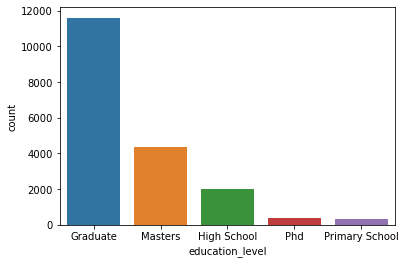

In [8]:
sns.countplot(tr.education_level)

C:\Users\Ashwin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='enrolled_university', ylabel='count'>

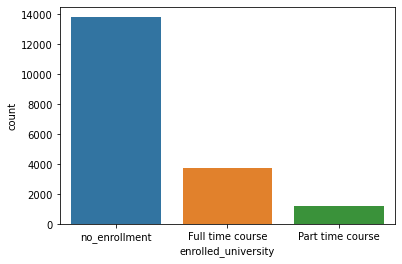

In [9]:
sns.countplot(tr.enrolled_university)

In [10]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city_development_index  19158 non-null  float64
 1   relevent_experience     19158 non-null  object 
 2   enrolled_university     18772 non-null  object 
 3   education_level         18698 non-null  object 
 4   experience              19093 non-null  object 
 5   last_new_job            18735 non-null  object 
 6   training_hours          19158 non-null  int64  
 7   target                  19158 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 1.2+ MB


In [11]:
tr.experience.value_counts()

>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: experience, dtype: int64

In [12]:
tr.describe()

,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000
mean,0.828848,65.366896,0.249348
std,0.123362,60.058462,0.432647
min,0.448000,1.000000,0.000000
25%,0.740000,23.000000,0.000000
50%,0.903000,47.000000,0.000000
75%,0.920000,88.000000,0.000000
max,0.949000,336.000000,1.000000


In [13]:
def getExperience(years):
    if(years=="<1"):
        return 0
    elif(years==">20"):
        return 21
    elif (pd.isnull(years)):
        return 9
    else:
        return int(years)

In [14]:
tr['experience']=tr['experience'].apply(lambda x: getExperience(x))
ts['experience']=ts['experience'].apply(lambda x: getExperience(x))

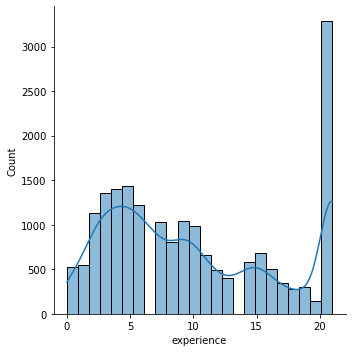

In [15]:
sns.displot(tr.experience,kde=True)

In [16]:
tr.isnull().sum()

city_development_index      0
relevent_experience         0
enrolled_university       386
education_level           460
experience                  0
last_new_job              423
training_hours              0
target                      0
dtype: int64

In [17]:
tr.enrolled_university.value_counts()

no_enrollment       13817
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64

In [18]:
def getEnrolled(years):
    if(years=="no_enrollment"):
        return 0
    elif(years=="Full time course"):
        return 1
    elif(years=="Part time course"):
        return 2
    elif(pd.isnull(years)):
        return random.choice([0,1,2])

In [19]:
getEnrolled(np.nan)

2

In [20]:
tr['enrolled_university']=tr['enrolled_university'].apply(lambda x: getEnrolled(x))
ts['enrolled_university']=ts['enrolled_university'].apply(lambda x: getEnrolled(x))

In [21]:
tr.isnull().sum()

city_development_index      0
relevent_experience         0
enrolled_university         0
education_level           460
experience                  0
last_new_job              423
training_hours              0
target                      0
dtype: int64

In [22]:
tr.education_level.value_counts()

Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64

In [23]:
def getEducation(years):
    if(years=="Graduate"):
        return 0
    elif(years=="Masters"):
        return 1
    elif(years=="High School"):
        return 2
    elif(years=="Phd"):
        return 3
    elif(years=="Primary School"):
        return 4
    elif(pd.isnull(years)):
        return random.choice([0,1,2,3,4])

In [24]:
getEducation("High School")

2

In [25]:
tr['education_level']=tr['education_level'].apply(lambda x: getEducation(x))
ts['education_level']=ts['education_level'].apply(lambda x: getEducation(x))

In [26]:
tr.education_level

0        0
1        0
2        0
3        0
4        1
        ..
19153    0
19154    0
19155    0
19156    2
19157    4
Name: education_level, Length: 19158, dtype: int64

In [27]:
tr.isnull().sum()

city_development_index      0
relevent_experience         0
enrolled_university         0
education_level             0
experience                  0
last_new_job              423
training_hours              0
target                      0
dtype: int64

In [28]:
tr.last_new_job.value_counts()

1        8040
>4       3290
2        2900
never    2452
4        1029
3        1024
Name: last_new_job, dtype: int64

In [29]:
def getNewJob(years):
    if(years=="never"):
        return 0
    elif(years==">4"):
        return 5
    elif(pd.isnull(years)):
        return random.choice([0,1,2,3,4,5])
    else:
        return int(years)

In [30]:
getNewJob(">4")

5

In [31]:
tr['last_new_job']=tr['last_new_job'].apply(lambda x: getNewJob(x))
ts['last_new_job']=ts['last_new_job'].apply(lambda x: getNewJob(x))

In [32]:
tr.isnull().sum()

city_development_index    0
relevent_experience       0
enrolled_university       0
education_level           0
experience                0
last_new_job              0
training_hours            0
target                    0
dtype: int64

We have thus handled all missing values and converted text data in most columns to numerical data

In [33]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city_development_index  19158 non-null  float64
 1   relevent_experience     19158 non-null  object 
 2   enrolled_university     19158 non-null  int64  
 3   education_level         19158 non-null  int64  
 4   experience              19158 non-null  int64  
 5   last_new_job            19158 non-null  int64  
 6   training_hours          19158 non-null  int64  
 7   target                  19158 non-null  float64
dtypes: float64(2), int64(5), object(1)
memory usage: 1.2+ MB


In [34]:
tr.relevent_experience

0        Has relevent experience
1         No relevent experience
2         No relevent experience
3         No relevent experience
4        Has relevent experience
                  ...           
19153     No relevent experience
19154    Has relevent experience
19155    Has relevent experience
19156    Has relevent experience
19157     No relevent experience
Name: relevent_experience, Length: 19158, dtype: object

In [35]:
def relevantExperience(exp):
    if(exp=="Has relevent experience"):
        return 1
    else:
        return 0

In [36]:
relevantExperience("No relevent experience")

0

In [37]:
tr['relevent_experience']=tr['relevent_experience'].apply(lambda x: relevantExperience(x))
ts['relevent_experience']=ts['relevent_experience'].apply(lambda x: relevantExperience(x))

In [38]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city_development_index  19158 non-null  float64
 1   relevent_experience     19158 non-null  int64  
 2   enrolled_university     19158 non-null  int64  
 3   education_level         19158 non-null  int64  
 4   experience              19158 non-null  int64  
 5   last_new_job            19158 non-null  int64  
 6   training_hours          19158 non-null  int64  
 7   target                  19158 non-null  float64
dtypes: float64(2), int64(6)
memory usage: 1.2 MB


In [39]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city_development_index  2129 non-null   float64
 1   relevent_experience     2129 non-null   int64  
 2   enrolled_university     2129 non-null   int64  
 3   education_level         2129 non-null   int64  
 4   experience              2129 non-null   int64  
 5   last_new_job            2129 non-null   int64  
 6   training_hours          2129 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 116.6 KB


In [40]:
tr.isnull().sum()

city_development_index    0
relevent_experience       0
enrolled_university       0
education_level           0
experience                0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [41]:
ts.isnull().sum()

city_development_index    0
relevent_experience       0
enrolled_university       0
education_level           0
experience                0
last_new_job              0
training_hours            0
dtype: int64

C:\Users\Ashwin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

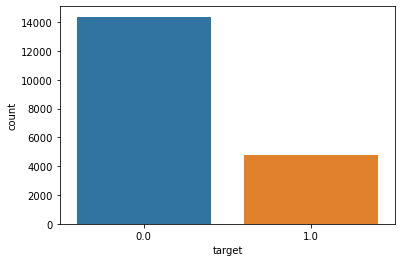

In [42]:
sns.countplot(tr.target)

By now, we have finished the cleaning of data and have converted it into a form that is usable by an ML Model

<AxesSubplot:>

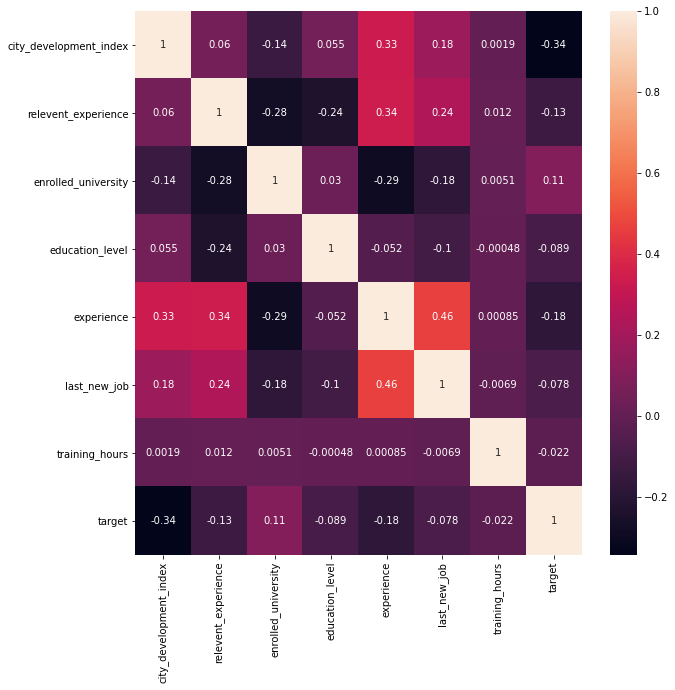

In [43]:
plt.figure(figsize=(10,10))
sns.heatmap(tr.corr(),annot=True)

In [44]:
X=['training_hours','relevent_experience','education_level','experience']
y=['target']

In [45]:
tr[y]

,target
0,1.0
1,0.0
2,0.0
3,1.0
4,0.0
...,...
19153,1.0
19154,1.0
19155,0.0
19156,0.0


In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(tr[X], tr['target'], test_size=0.25, random_state=42)

In [48]:
from sklearn.naive_bayes import CategoricalNB

In [49]:
cnb=CategoricalNB()

In [50]:
cnb.fit(X_train,y_train)

CategoricalNB()

In [51]:
pred=cnb.predict(X_test)

In [52]:
from sklearn.metrics import confusion_matrix,classification_report

In [53]:
print(confusion_matrix(y_test,pred))

[[3479  105]
 [1104  102]]


In [54]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.76      0.97      0.85      3584
         1.0       0.49      0.08      0.14      1206

    accuracy                           0.75      4790
   macro avg       0.63      0.53      0.50      4790
weighted avg       0.69      0.75      0.67      4790

